In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\data\customer_booking.csv", encoding='latin1')

In [3]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
#checking for null values
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
#checking for duplicate values
data.duplicated().sum()

719

In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


#### Checking categorical variables

In [9]:
data['sales_channel'].value_counts()

sales_channel
Internet    43917
Mobile       5364
Name: count, dtype: int64

In [10]:
data['trip_type'].value_counts()

trip_type
RoundTrip     48779
OneWay          386
CircleTrip      116
Name: count, dtype: int64

In [11]:
data['flight_day'].value_counts()

flight_day
Mon    7988
Wed    7562
Tue    7558
Thu    7323
Fri    6685
Sun    6442
Sat    5723
Name: count, dtype: int64

* Majority of the people have traveled on monday.

In [12]:
data['route'].value_counts()

route
AKLKUL    2620
PENTPE     912
MELSGN     833
ICNSIN     793
DMKKIX     729
          ... 
AKLHGH       1
JEDPDG       1
JEDPEN       1
DACPEK       1
MRUXIY       1
Name: count, Length: 799, dtype: int64

In [13]:
top_countries = data['booking_origin'].value_counts().head(30).index.tolist()

In [14]:
top_countries

['Australia',
 'Malaysia',
 'South Korea',
 'Japan',
 'China',
 'Indonesia',
 'Taiwan',
 'Thailand',
 'India',
 'New Zealand',
 'Singapore',
 'United States',
 'Vietnam',
 'Macau',
 'Hong Kong',
 'Philippines',
 'United Kingdom',
 'Brunei',
 'Cambodia',
 '(not set)',
 'Sri Lanka',
 'Italy',
 'France',
 'Canada',
 'Germany',
 'Myanmar (Burma)',
 'Netherlands',
 'Mauritius',
 'United Arab Emirates',
 'Nepal']

In [15]:
##We will only include top countries from where the bookings have been done.
data = data[data['booking_origin'].isin(top_countries)]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48817 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         48817 non-null  int64  
 1   sales_channel          48817 non-null  object 
 2   trip_type              48817 non-null  object 
 3   purchase_lead          48817 non-null  int64  
 4   length_of_stay         48817 non-null  int64  
 5   flight_hour            48817 non-null  int64  
 6   flight_day             48817 non-null  object 
 7   route                  48817 non-null  object 
 8   booking_origin         48817 non-null  object 
 9   wants_extra_baggage    48817 non-null  int64  
 10  wants_preferred_seat   48817 non-null  int64  
 11  wants_in_flight_meals  48817 non-null  int64  
 12  flight_duration        48817 non-null  float64
 13  booking_complete       48817 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [17]:
data['booking_origin'].value_counts()

booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
Indonesia                2317
Taiwan                   2042
Thailand                 1993
India                    1258
New Zealand              1060
Singapore                1034
United States             453
Vietnam                   386
Macau                     301
Hong Kong                 294
Philippines               265
United Kingdom            173
Brunei                    161
Cambodia                  131
(not set)                  78
Sri Lanka                  73
France                     58
Italy                      58
Canada                     57
Germany                    54
Myanmar (Burma)            51
Netherlands                45
Mauritius                  43
United Arab Emirates       42
Nepal                      39
Name: count, dtype: int64

In [18]:
data['booking_complete'].value_counts()/len(data['booking_complete'])*100

booking_complete
0    84.992933
1    15.007067
Name: count, dtype: float64

In [19]:
data['wants_extra_baggage'].value_counts()

wants_extra_baggage
1    32633
0    16184
Name: count, dtype: int64

In [20]:
data['wants_preferred_seat'].value_counts()

wants_preferred_seat
0    34363
1    14454
Name: count, dtype: int64

In [21]:
data['wants_in_flight_meals'].value_counts()

wants_in_flight_meals
0    27973
1    20844
Name: count, dtype: int64

In [22]:
## We have 'not set' opiton in our country column which will be considered as null value

data['booking_origin'] = data['booking_origin'].replace("(not set)",None)

In [23]:
data.isnull().sum()

num_passengers            0
sales_channel             0
trip_type                 0
purchase_lead             0
length_of_stay            0
flight_hour               0
flight_day                0
route                     0
booking_origin           78
wants_extra_baggage       0
wants_preferred_seat      0
wants_in_flight_meals     0
flight_duration           0
booking_complete          0
dtype: int64

In [24]:
data.dropna(inplace=True)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48739 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         48739 non-null  int64  
 1   sales_channel          48739 non-null  object 
 2   trip_type              48739 non-null  object 
 3   purchase_lead          48739 non-null  int64  
 4   length_of_stay         48739 non-null  int64  
 5   flight_hour            48739 non-null  int64  
 6   flight_day             48739 non-null  object 
 7   route                  48739 non-null  object 
 8   booking_origin         48739 non-null  object 
 9   wants_extra_baggage    48739 non-null  int64  
 10  wants_preferred_seat   48739 non-null  int64  
 11  wants_in_flight_meals  48739 non-null  int64  
 12  flight_duration        48739 non-null  float64
 13  booking_complete       48739 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [26]:
data['booking_complete'].value_counts()

booking_complete
0    41427
1     7312
Name: count, dtype: int64

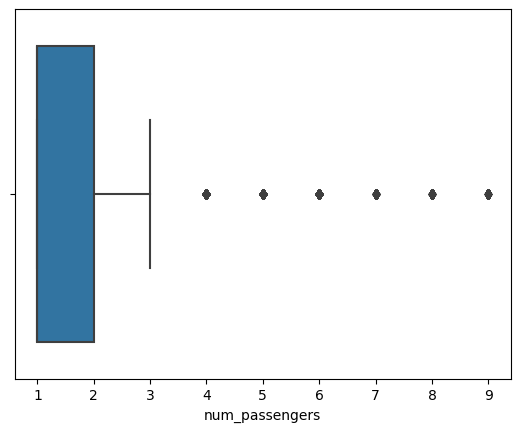

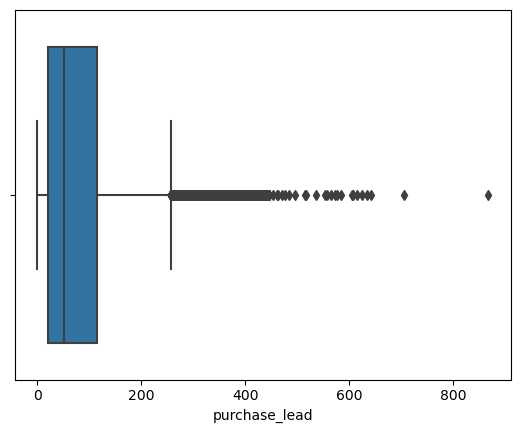

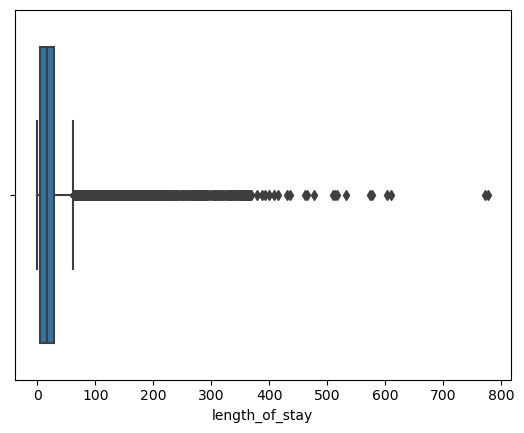

In [27]:
## Checking for outliers

num_cols = data[['num_passengers','purchase_lead','length_of_stay']]

for col in num_cols:
    sns.boxplot(data=data,x=col)
    plt.xlabel(col)
    plt.show()

In [28]:
outlier_count = {}

for col in num_cols:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    outlier_count[col] = len(outliers)
    
for col, count in outlier_count.items():
    print(f"Number of outliers in {col}: {count}")

Number of outliers in num_passengers: 2828
Number of outliers in purchase_lead: 3373
Number of outliers in length_of_stay: 3698


In [29]:
num_cols.describe()

,num_passengers,purchase_lead,length_of_stay
count,48739.000000,48739.000000,48739.000000
mean,1.590923,84.876772,23.000841
std,1.018156,90.574287,33.759930
min,1.000000,0.000000,0.000000
25%,1.000000,21.000000,5.000000
50%,1.000000,51.000000,17.000000
75%,2.000000,115.000000,28.000000
max,9.000000,867.000000,778.000000


In [30]:
## Checking for multicollinearity 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in data.columns:
    if data[col].dtypes == 'object':
        data[col] = le.fit_transform(data[col])

In [32]:
x = data.drop('booking_complete',axis=1)
y = data['booking_complete']

In [33]:
vif_dataframe = pd.DataFrame()
vif_dataframe["columns"] = x.columns
vif_dataframe["VIF_values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_dataframe

,columns,VIF_values
0,num_passengers,3.723685
1,sales_channel,1.135329
2,trip_type,38.055176
3,purchase_lead,2.020063
4,length_of_stay,1.587491
5,flight_hour,3.787941
6,flight_day,3.264772
7,route,4.064154
8,booking_origin,2.243908
9,wants_extra_baggage,3.395438


### We will run logistic regression with and with outliers and multicollinearity to check which approch gives better results.

In [34]:
## Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(x)

In [35]:
## Spliting the data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled_X,y,train_size=0.70,stratify = y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((34117, 13), (14622, 13), (34117,), (14622,))

In [36]:
## Building Logistic Regression model

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(class_weight='balanced')

In [37]:
classifier.fit(x_train,y_train)

predicted_values_tr = classifier.predict(x_train)
predicted_proba_tr = classifier.predict_proba(x_train)

predicted_values_ts = classifier.predict(x_test)
predcited_proba_ts = classifier.predict_proba(x_test)


In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_train,predicted_values_tr))

              precision    recall  f1-score   support

           0       0.91      0.60      0.72     28999
           1       0.22      0.65      0.33      5118

    accuracy                           0.61     34117
   macro avg       0.56      0.62      0.53     34117
weighted avg       0.80      0.61      0.66     34117



In [40]:
print(classification_report(y_test,predicted_values_ts))

              precision    recall  f1-score   support

           0       0.91      0.60      0.72     12428
           1       0.22      0.65      0.33      2194

    accuracy                           0.61     14622
   macro avg       0.57      0.63      0.53     14622
weighted avg       0.80      0.61      0.67     14622



* We got 60% accuracy score

### Lest run the models without ouliers and multicollinearity

In [41]:
data.to_csv('clean_data_.csv', index=False)

In [42]:
num_cols2 = data[['num_passengers','purchase_lead','length_of_stay']]

In [43]:
for col in num_cols2:
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    iqr = Q3-Q1
    
    Ul = Q3 + 1.5*iqr
    ll = Q1 - 1.5*iqr 
    
    new_data = data[(data[col]>=ll)& (data[col]<=Ul)]

In [44]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45041 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         45041 non-null  int64  
 1   sales_channel          45041 non-null  int32  
 2   trip_type              45041 non-null  int32  
 3   purchase_lead          45041 non-null  int64  
 4   length_of_stay         45041 non-null  int64  
 5   flight_hour            45041 non-null  int64  
 6   flight_day             45041 non-null  int32  
 7   route                  45041 non-null  int32  
 8   booking_origin         45041 non-null  int32  
 9   wants_extra_baggage    45041 non-null  int64  
 10  wants_preferred_seat   45041 non-null  int64  
 11  wants_in_flight_meals  45041 non-null  int64  
 12  flight_duration        45041 non-null  float64
 13  booking_complete       45041 non-null  int64  
dtypes: float64(1), int32(5), int64(8)
memory usage: 4.3 MB


In [45]:
X= new_data.drop('booking_complete',axis=1)
Y= new_data['booking_complete']

In [46]:
X.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,0,2,262,19,7,2,0,18,1,0,0,5.52
1,1,0,2,112,20,3,2,0,18,0,0,0,5.52
2,2,0,2,243,22,17,6,0,8,1,1,0,5.52
3,1,0,2,96,31,4,2,0,18,0,0,1,5.52
4,2,0,2,68,22,15,6,0,8,1,0,1,5.52


In [47]:
vif_dataframe = pd.DataFrame()
vif_dataframe["columns"] = X.columns
vif_dataframe["VIF_values"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_dataframe

,columns,VIF_values
0,num_passengers,3.737086
1,sales_channel,1.140575
2,trip_type,38.426934
3,purchase_lead,2.034836
4,length_of_stay,2.671437
5,flight_hour,3.801642
6,flight_day,3.266717
7,route,4.095552
8,booking_origin,2.346413
9,wants_extra_baggage,3.360513


In [48]:
X.drop('trip_type',axis=1,inplace=True)

In [49]:
vif_dataframe = pd.DataFrame()
vif_dataframe["columns"] = X.columns
vif_dataframe["VIF_values"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_dataframe

,columns,VIF_values
0,num_passengers,3.535525
1,sales_channel,1.129465
2,purchase_lead,2.031792
3,length_of_stay,2.635472
4,flight_hour,3.630743
5,flight_day,3.132708
6,route,3.524681
7,booking_origin,2.080270
8,wants_extra_baggage,3.341639
9,wants_preferred_seat,1.618859


In [50]:
X.drop('flight_duration',axis=1,inplace=True)

In [51]:
vif_dataframe = pd.DataFrame()
vif_dataframe["columns"] = X.columns
vif_dataframe["VIF_values"] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_dataframe

,columns,VIF_values
0,num_passengers,3.350731
1,sales_channel,1.121573
2,purchase_lead,1.948285
3,length_of_stay,2.336961
4,flight_hour,3.278333
5,flight_day,2.852401
6,route,3.193613
7,booking_origin,2.039427
8,wants_extra_baggage,3.297488
9,wants_preferred_seat,1.606665


In [52]:
scaled_x = scaler.fit_transform(X)

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(scaled_x,Y,train_size=0.70,stratify = Y)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((31528, 11), (13513, 11), (31528,), (13513,))

In [61]:
classifier2 = LogisticRegression(class_weight='balanced')

In [62]:
classifier2.fit(X_train,Y_train)

LogisticRegression(class_weight='balanced')

In [63]:
predicted_values_ts2 = classifier2.predict(X_test)

In [64]:
print(classification_report(Y_test,predicted_values_ts2))

              precision    recall  f1-score   support

           0       0.90      0.62      0.74     11482
           1       0.22      0.59      0.32      2031

    accuracy                           0.62     13513
   macro avg       0.56      0.61      0.53     13513
weighted avg       0.79      0.62      0.67     13513



* WE got 62% acccracy after removing outliers and multicollinearirty 